Let $V(\nu) \sim \mathcal{N}(\nu^{-2}, \nu^{-2}/10)$. That is, let the visibility as a function of frequency, in Jy.sr, be drawn from a normal distribution, with diagonal covariance:

In [146]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm
from powerbox.dft import fft
from scipy.linalg import dft
from numpy.fft import fftshift

mn = lambda nu : nu**-1.
std = lambda nu : 0.1*mn(nu)

def draw_vis(nu):
    return np.random.normal(mn(nu), std(nu))

To make sure we defined that right:

In [147]:
Nreal = 1000
Nnu = 100

nu = np.linspace(100,150,Nnu)
L = nu.max() - nu.min()
dnu = L/Nnu

vis = np.zeros((Nnu,Nreal))
for i in range(Nreal):
    vis[:,i] = draw_vis(nu)

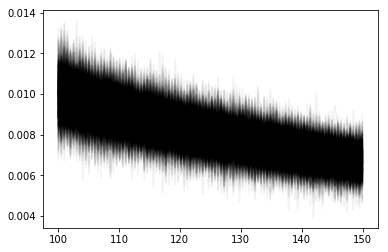

In [148]:
plt.plot(nu,vis,color='k',alpha=0.05)
plt.show()

Define the unitary Fourier matrix:

In [149]:
F = dft(Nnu, "sqrtn")
F = fftshift(F)

Now, we get the power from each of these (this will have units of Jy^2.sr^2.Hz, since we don't care about the kperp part here):

In [150]:
# Do the FT in the nu plane.
V = np.zeros(vis.shape,dtype="complex128")
for i in tqdm.tqdm(range(Nreal)):
    V[:,i], eta = fft(vis[:,i], L=L, a=0., b=2*np.pi)

V_F = np.zeros(vis.shape,dtype="complex128")
for i in tqdm.tqdm(range(Nreal)):
    V_F[:,i] = F.dot(vis[:,i]) * L/np.sqrt(Nnu)

    
# Generate PS from FT
ps = np.real(np.abs(V)**2)
ps_F = np.real(np.abs(V_F)**2)

#ps /= nu.max()-nu.min()

100%|██████████| 1000/1000 [00:00<00:00, 74007.55it/s]


In [151]:
np.abs(V_F[:,0])/ np.abs(V[:,0])

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

We can get the variance of the power:

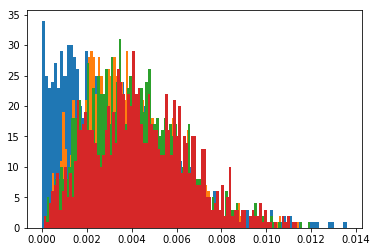

In [152]:
plt.hist(np.abs(V[0,:]),bins=100)
plt.hist(np.abs(V[20,:]),bins=100)
plt.hist(np.abs(V[30,:]),bins=100)
plt.hist(np.abs(V[40,:]),bins=100)

plt.show()

In [153]:
brute_var_P = np.var(ps,axis=1)
brute_var_V = np.var(V,axis=1)


Now, get the expected variance using $F^\dagger C C F$:

In [154]:
C = np.diag(std(nu)**2)

exp_var_P = np.diag(np.conjugate(F.T).dot(C).dot(C).dot(F))
exp_var_V = np.diag(np.conjugate(F.T).dot(C).dot(F))

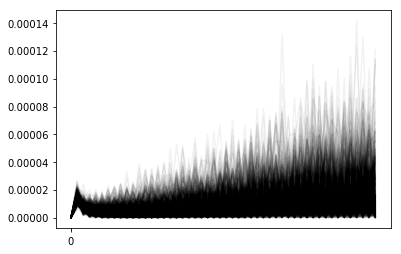

In [155]:
plt.plot(eta[0][Nnu/2:],(ps[Nnu/2:].T*eta[0][Nnu/2:]**1).T,color='k',alpha=0.05)
plt.xscale("symlog")
#plt.yscale('log')
plt.show()

In [156]:
print brute_var_V /np.abs(exp_var_V * (L/np.sqrt(Nnu))**2)

[ 0.90982288  0.96734628  0.96800235  1.00755177  0.97137247  0.99955723
  0.97697496  0.91496874  1.00755084  1.03050649  0.99725592  1.01321255
  1.04005077  1.00643494  1.0131048   0.98290887  0.99351038  0.9776013
  1.02183172  1.00937726  0.99190912  1.06640416  0.93491215  0.95469085
  0.98547231  1.03085513  0.97433425  0.99250323  0.97381195  0.97577605
  1.06072975  1.00331067  1.00637654  1.00716163  0.98180605  1.03803809
  0.99947806  1.02539094  1.01442488  1.03650083  1.01315808  0.99138546
  1.00806502  1.03517837  0.97675281  0.98701397  0.99832805  0.9570384
  0.9302691   0.9907247   1.09437044  0.9907247   0.9302691   0.9570384
  0.99832805  0.98701397  0.97675281  1.03517837  1.00806502  0.99138546
  1.01315808  1.03650083  1.01442488  1.02539094  0.99947806  1.03803809
  0.98180605  1.00716163  1.00637654  1.00331067  1.06072975  0.97577605
  0.97381195  0.99250323  0.97433425  1.03085513  0.98547231  0.95469085
  0.93491215  1.06640416  0.99190912  1.00937726  1.02

In [157]:
print brute_var_P /np.abs(exp_var_P * (L/np.sqrt(Nnu))**4)

[  1.85751461e+00   9.15531624e-01   8.82332004e-01   1.00119895e+00
   9.39050410e-01   1.06470831e+00   9.49762863e-01   8.28845323e-01
   1.03281712e+00   1.07682117e+00   1.10062088e+00   1.21826790e+00
   1.12089279e+00   1.04487154e+00   1.02692696e+00   8.40800886e-01
   1.15277605e+00   1.02874000e+00   1.09875896e+00   1.02140443e+00
   1.10374655e+00   1.23175650e+00   1.02405869e+00   1.06350392e+00
   1.02186845e+00   1.23926190e+00   1.04223915e+00   1.10977923e+00
   1.10623678e+00   1.01467299e+00   1.31503320e+00   1.09606991e+00
   1.39155921e+00   1.28176668e+00   1.22714956e+00   1.31199072e+00
   1.37336566e+00   1.53953568e+00   1.71815912e+00   1.66128751e+00
   1.68458719e+00   2.04960079e+00   2.36784744e+00   2.76050708e+00
   3.40621242e+00   4.15044623e+00   5.85321494e+00   1.01059643e+01
   2.00460664e+01   8.13056158e+01   4.07770345e+04   8.13056158e+01
   2.00460664e+01   1.01059643e+01   5.85321494e+00   4.15044623e+00
   3.40621242e+00   2.76050708e+00